# Import library and data

In [20]:
import requests
import numpy as np
import matplotlib.pyplot as plt

``` python
url = "https://s3.amazonaws.com/appforest_uf/f1678907491882x777874554533324300/input.txt"
r = requests.get(url)
print(r.status_code)

matrix = r.text
matrix = matrix.split('\n')

with open('./matrix.txt', 'w') as file:
    for line in matrix:
        file.write(line)
    file.close()
```    

In [21]:
matrix = np.loadtxt('matrix.txt')
print(matrix.shape)
matrix

(65, 85)


array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 4.]])

# Creating function and running

In [22]:
def update(state):
    new_state = np.copy(state)
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            # Select neighbors
            neighbors = state[max(0, i-1):min(i+2, state.shape[0]),
                              max(0, j-1):min(j+2, state.shape[1])]
            # Exclude atual cell and get active cells count
            count = np.sum(neighbors) - state[i, j]
            # Apply Rules
            # White cells turn green if they have a number of adjacent green cells greater than 1 and less than 5.
            # Otherwise, they remain white        
            if state[i, j] == 0 and (count > 1 and count < 5):
                new_state[i, j] = 1
            # Green cells remain green if they have a number of green adjacent cells greater than 3 and less than 6.
            # Otherwise they become white.                
            elif state[i, j] == 1 and not (count > 3 and count < 6):
                new_state[i, j] == 0
                
    return new_state

Initial State


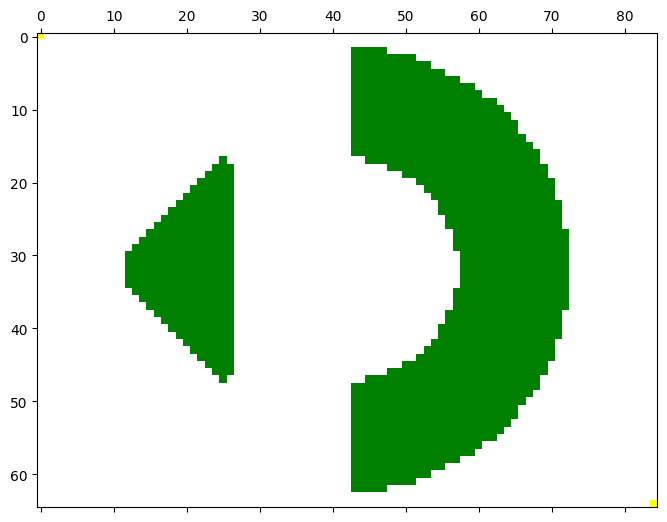

T 1


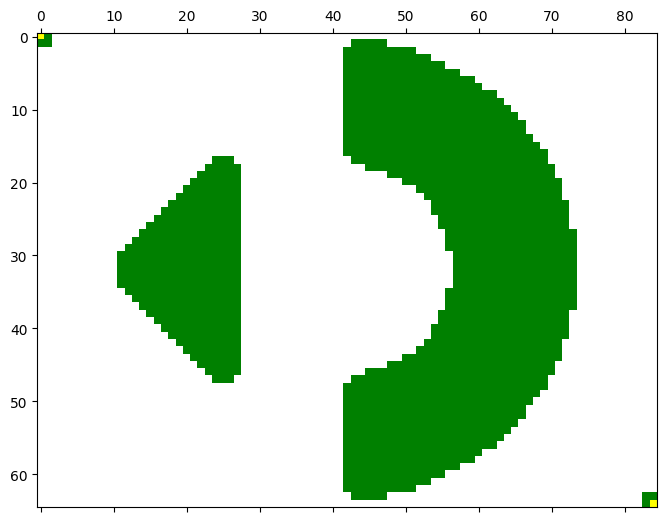

T 2


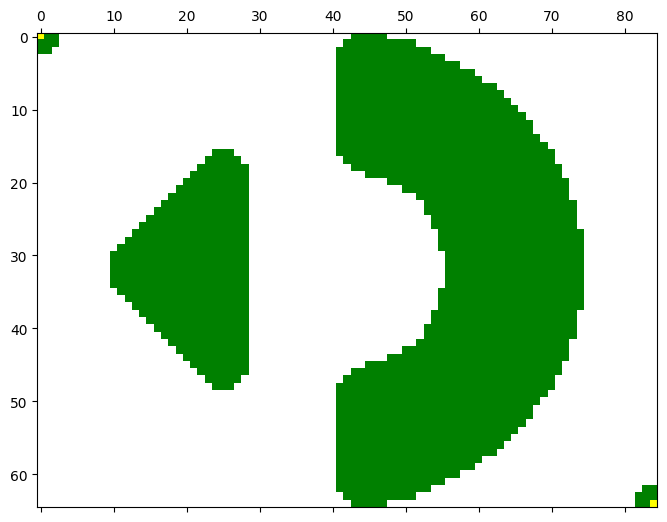

T 3


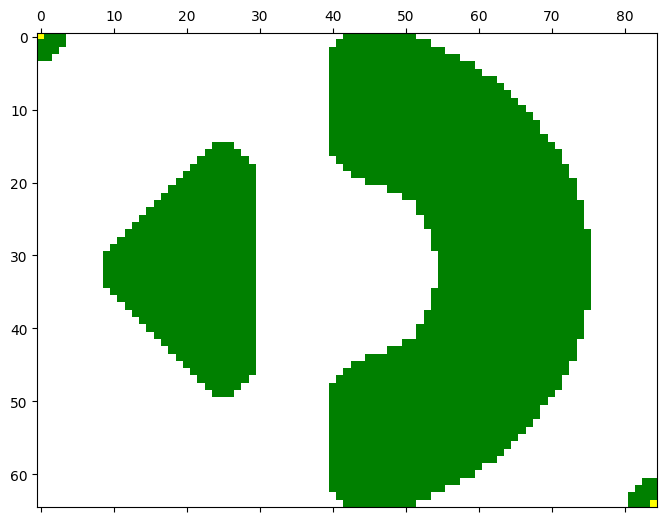

T 4


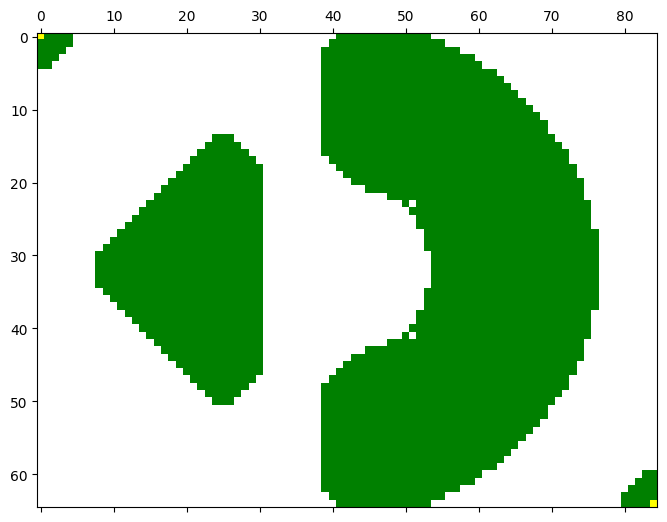

T 5


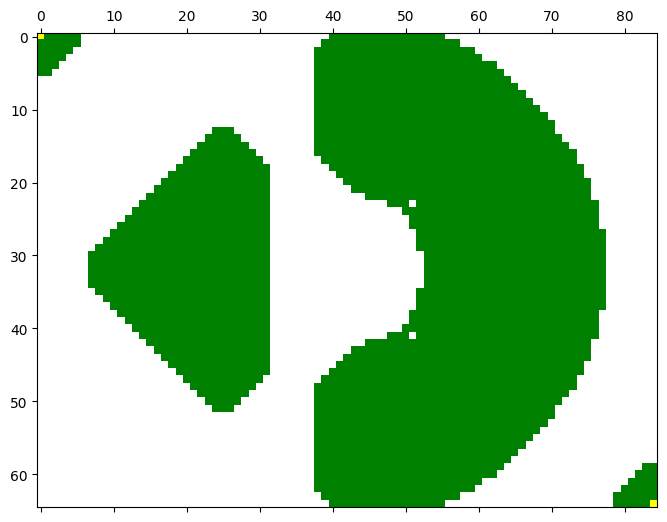

In [23]:
n_iterations = 5
# Colors
colors = np.array(['white', 'green', 'yellow', 'yellow'])
# colors = np.array(['white', 'green'])
cmap = plt.cm.colors.ListedColormap(colors)

# Plot initial state
print("Initial State")
initial_state = np.copy(matrix)
fig, ax = plt.subplots(figsize=(8, 10))
ax.matshow(initial_state, cmap=cmap)
plt.show()

# Update the state and plot the result
n = 0
state = np.copy(initial_state)
for i in range(n_iterations):
    state = update(state)
    # Count the iteration
    n += 1
    print(f"T {n}")
    
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.matshow(state, cmap=cmap)
    plt.show()

# Testes

In [58]:
i = 10
j = 45

## State

In [59]:
state = np.copy(initial_state)
state

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
state.shape

(65, 85)

In [61]:
state[0,0], state[64, 84]

(0.0, 0.0)

In [62]:
neighbors = state[max(0, i-1):min(i+2, state.shape[0]),
                    max(0, j-1):min(j+2, state.shape[1])]
neighbors

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [64]:
count = np.sum(neighbors) - state[i, j]
count

8.0

In [65]:
state[i, j]

1.0

In [33]:
# Cell = 0
print(count > 1 and count < 5)

False


In [66]:
# Cell = 1
print(count <= 3 or count >= 6)

True


In [67]:
new_state = np.copy(state)
if state[i, j] == 0 and (count > 1 and count < 5):
    new_state[i, j] = 1
# Green cells remain green if they have a number of green adjacent cells greater than 3 and less than 6.
# Otherwise they become white.                
elif state[i, j] == 1 and not (count > 3 and count < 6):
    new_state[i, j] == 0

In [68]:
new_state[i, j]

1.0